# Lab 7 - Dynamic Programming - Power Plant

Information on group members:

1) 156071, Martyna Stasiak <br>
2) 156062, Maria Musiał

In [210]:
%matplotlib inline

from sympy.interactive import printing
printing.init_printing(use_latex=True)

import matplotlib.pyplot as plt
import sympy as sym
from sympy import *
import numpy as np
from sympy import Max, Min

This exercise is inspired by Ex. 2 in the Exercises.pdf file. You have to set operating levels for a power plant for consecutive two-months in a way that minimizes the operating costs (using dynamic programming). Before going to the exercise, it is recommended to get acquainted with a Python library for symbolic calculations - SymPy, which can be particularly helpful for solving this task. 

# Mini tutorial on SymPy

SymPy is a library for performing symbolic calculations instead of numerical. It allows defining symbols, functions, expressions, equations and performing various operations on them. The examples of such operations that can help solve this exercise are given below. Note that due to lines: <br><br>
from sympy.interactive import printing <br>
printing.init_printing(use_latex=True)  <br><br>
located in the first cell of this notebook, the symbols can be printed using latex, improving hence readability

<b> Defining symbols: </b>

In [211]:
z1, z2 = symbols("z1 z2")
# or z = symbols("z1 z2")

<b> Printing a symbol using Latex: </b>

In [212]:
z1

z₁

<b> Defining an expression: </b>

In [213]:
2*z1 + (10-z2)**2

                2
2⋅z₁ + (10 - z₂) 

<b>Expanding the expression:</b>

In [214]:
expand(2*z1 + (10-z2)**2)

         2              
2⋅z₁ + z₂  - 20⋅z₂ + 100

<b> Simplifying the expression:</b>

In [215]:
e = simplify(expand(2*z1 + (10-z2)**2 - (5+z1)**2))
e

    2            2             
- z₁  - 8⋅z₁ + z₂  - 20⋅z₂ + 75

<b> Substituting a variable with a value in the expression:</b>

In [216]:
e = 2*z1 + (10-z1)**2
v = e.evalf(subs={z1: 10})
print(v)

20.0000000000000


<b> Substituting a variable with another variable or value:</b>

In [217]:
e = 2*z1 + (10-z2)**2
e.subs(z2, z1)

                2
2⋅z₁ + (10 - z₁) 

<b> Finding a (partial) derivative: </b>

In [218]:
e = 2*z1 + (10-z2)**2
d = diff(e, z2)
d

2⋅z₂ - 20

<b> Solving an equation: </b>

In [219]:
e = 2*z1 + (10-z2)**2
d = diff(e, z2)
v = solve(Eq(d, 0), z2)
print(v)

[10]


# Exercise

Below given is the data. In contrast to the exercise shown in the Exercise.pdf file, note that all pairs of all 12 months are considered stages in this notebook. 

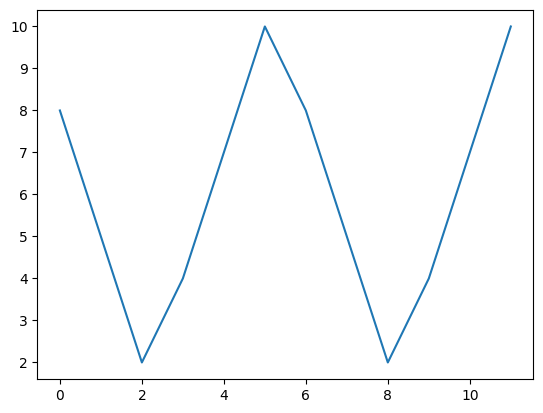

[[8, 10], [5, 10], [2, 10], [4, 10], [7, 10], [10, 10]]
[8, 5, 2, 4, 7, 10, 8, 5, 2, 4, 7, 10]


In [220]:
months = ["Jan-Feb", "Mar-Apr", "May-Jun", "Jul-Aug", "Sep-Oct", "Nov-Dec"]

### min requested operating level (1-10) + allowable bounds 
request = [8,5,2,4,7,10]
bounds = [[request[i], 10] for i in range(6)]

plt.plot([i for i in range(12)], request + request, label='linear')
plt.show()
print(bounds)
print(request + request)

<b> Cost: </b> Working above the required level - cost in a generic form:

In [221]:
xi, ri, mi1 = symbols("x_i r_i m_{i1}") 
cost_above = mi1*(xi-ri)
cost_above #mi1 = multiplicator, #xi = operating level #ri = requirement (lower bound)

m_{i1}⋅(-rᵢ + xᵢ)

You can do c = cost_above.copy() and then c.subs, replacing variables with values (m, p, r) or other variables (r): 

In [222]:
# x1 = symbols("x1") 
# c = cost_above.copy()
# c = c.subs(xi, x1)
# c = c.subs(mi1, 1)
# c = c.subs(ri, 100)
# c

Below are provided m parameter values for each month:

In [223]:
mv1 = [2, 8, 10, 12, 10, 6 ]

<b> Cost: </b> Chaging the operating level - cost in a generic form:

In [224]:
si, mi2, pi = symbols("s_{i} m_{i2} p_i") 
cost_change = mi2*(xi-si)**pi
cost_change #mi2 = multiplicator, #pi = exponent #xi = operating level (i-th month) #s_{i} = state: operating level ((i-1)-th month)
cost_change

                    pᵢ
m_{i2}⋅(-s_{i} + xᵢ)  

Below are provided m and p parameter values for each month:

In [225]:
mv2 = [6, 4, 1, 1, 3, 5]
pv = [2, 2, 2, 2, 2, 2]

# Solution:

Apart from finding optimal operating levels for each month, plot these values along with the lower bounds for each month in order to show how they change in time.<br><br>Hints:<br>
- the optimal cost = 135.42<br>
- there is no situation when the minima for first derivatives are outside allowable bounds (but test it anyway)<br><br>

After obtaining and plotting the solution, check what would happen is you change the mv1[2] parameter to 5. 

Initial symbolic states for stages: [10, s2, s3, s4, s5, s6, s7]
10
Stage 6:
  Cost Above: 6*x6 - 60
  Cost Change: 5*(-s6 + x6)**2
  Total cost: 6*x6 + 5*(-s6 + x6)**2 - 60
  Derivative: -10*s6 + 10*x6 + 6
  Optimal x: 10
  Fstar: 5*(10 - s6)**2


Piecewise((10, 0.375*s5 + 5.625 > 10), (7, 0.375*s5 + 5.625 < 7), (0.375*s5 + 5.625, True))
Stage 5:
  Cost Above: 10*x5 - 70
  Cost Change: 3*(-s5 + x5)**2
  Total cost: 10*x5 + 5*(10 - x5)**2 + 3*(-s5 + x5)**2 - 70
  Derivative: -6*s5 + 16*x5 - 90
  Optimal x: 0.375*s5 + 5.625
  Fstar: 3.75*s5 + 94.921875*(1 - 0.111111111111111*s5)**2 + 95.703125*(1 - 0.0857142857142857*s5)**2 - 13.75


Piecewise((10, 0.347826086956522*s4 + 3.78260869565217 > 10), (4, 0.347826086956522*s4 + 3.78260869565217 < 4), (0.347826086956522*s4 + 3.78260869565217, True))
Stage 4:
  Cost Above: 12*x4 - 48
  Cost Change: (-s4 + x4)**2
  Total cost: 15.75*x4 + 94.921875*(1 - 0.111111111111111*x4)**2 + 95.703125*(1 - 0.0857142857142857*x4)**2 + (-s4 + x4)**2 - 61.75
  D

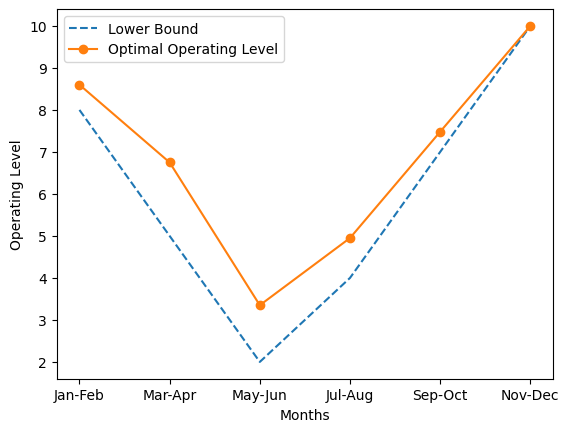

In [ ]:
def PowerPlant(bounds, cost_above, mv1, cost_change, mv2, pv):
    all_x, all_s, all_c_above, all_c_change = [], [], [], []
    x_for_stages = [symbols(f's{i}') for i in range(1, len(bounds) + 2)]
    x_for_stages[0] = 10  # Initial operating level
    print("Initial symbolic states for stages:", x_for_stages)
    
    optimal_x = []  # To store optimal values for each stage
    f_star = [0] * (len(bounds) + 1)  # Initialize as a symbolic zero
    f_star[-1] = Integer(0)

    for stage in range(len(bounds), 0, -1):  # Approach starting with the last stage
        x = symbols("x" + str(stage))
        s = symbols(f"s{stage}")
        all_s.append(s)
        all_x.append(x)
        
        # Changing the cost of going above the requirement of the current stage
        c_above = cost_above.copy()
        c_above = c_above.subs(xi, x)
        c_above = c_above.subs(mi1, mv1[stage-1])
        c_above = c_above.subs(ri, bounds[stage-1][0])
        all_c_above.append(c_above)
        
        # Changing the cost of changing the stage for the current stage
        c_change = cost_change.copy()
        c_change = c_change.subs(xi, x)
        c_change = c_change.subs(mi2, mv2[stage-1])
        c_change = c_change.subs(si, x_for_stages[stage-1])
        c_change = c_change.subs(pi, pv[stage-1])
        all_c_change.append(c_change)
        
        if f_star[stage] == 0:  #if last level
            f = 0
        else:       #else change s_i=x_i-1
            f = f_star[stage].subs(symbols(f"s{stage+1}"), x)   
            # f = f_star[stage].subs(symbols(f"s{stage+1}"), s)   
        
        total_cost = c_above + c_change + f   #changing + working + before cost
        
        cost_der = diff(total_cost, x)   #get derivative
        optimal_x_value = (solve(cost_der, x)[0].evalf(), 10)[stage == len(bounds)]  #derivative = 0, gives x as parametric value


        low = bounds[stage-1][0]
        up = bounds[stage-1][1]
        interval = Interval(low, up)
        out = 0
        # optimal_x_value_check = Piecewise(
        #     (bounds[stage-1][1], optimal_x_value > bounds[stage-1][1]),
        #     (bounds[stage-1][0], optimal_x_value < bounds[stage-1][0]),
        #     (optimal_x_value, True)
        # )  
        # print(optimal_x_value_check)



        # if optimal_x_value != up:
        #     if up < optimal_x_value.subs(s, up):
        #         out = 1
        #         optimal_x_value.subs(s, solve(simplify(expand(Eq(optimal_x_value, up))), s))
        #     if low > optimal_x_value.subs(s, low):
        #         out = 1
        #         optimal_x_value.subs(s, solve(simplify(expand(Eq(optimal_x_value, low))), s))
                
                
                
        f_star[stage-1] = total_cost.subs(x, optimal_x_value)
        optimal_x.append(optimal_x_value)
        print(f"Stage {stage}:")
        print(f"  Cost Above: {c_above}")
        print(f"  Cost Change: {c_change}")
        print(f"  Total cost: {total_cost}")
        print(f"  Derivative: {cost_der}")
        print(f"  Optimal x: {optimal_x_value}")
        print(f"  Fstar: {f_star[stage-1]}")
        if out ==1:
            print(f"  Minima for the first derivative is outside of bounds!")
        print('\n')
    
    
    # optimal_x = [optimal_x_value.evalf() for optimal_x_value in optimal_x]
    # print(f"  Optimal x: {optimal_x}")
    optimal_x.reverse()
    optimal_final = optimal_x.copy()
    for i in range(1, len(optimal_x) - 1):  
        optimal_final[i] = round(optimal_final[i].subs(symbols(f"s{i+1}"), optimal_final[i-1]),2)
    optimal_final[0] = round(optimal_final[0],2)
    return round(f_star[0],2), optimal_final

# Calculate the optimal operating levels
cost, levels = PowerPlant(bounds, cost_above, mv1, cost_change, mv2, pv)
print(f"Cost: {cost}\nLevels: {levels}")

# Plot the results
plt.plot(months, [bound[0] for bound in bounds], label='Lower Bound', linestyle='--')
plt.plot(months, levels, label='Optimal Operating Level', marker='o')
plt.xlabel('Months')
plt.ylabel('Operating Level')
plt.legend()
plt.show()

## Checking with mv1[2]=5

In [227]:
PowerPlant(bounds, cost_above, [2, 8, 5, 12, 10, 6], cost_change, mv2, pv)

Initial symbolic states for stages: [10, s2, s3, s4, s5, s6, s7]
Stage 6:
  Cost Above: 6*x6 - 60
  Cost Change: 5*(-s6 + x6)**2
  Total cost: 6*x6 + 5*(-s6 + x6)**2 - 60
  Derivative: -10*s6 + 10*x6 + 6
  Optimal x: 10
  Fstar: 5*(10 - s6)**2


Stage 5:
  Cost Above: 10*x5 - 70
  Cost Change: 3*(-s5 + x5)**2
  Total cost: 10*x5 + 5*(10 - x5)**2 + 3*(-s5 + x5)**2 - 70
  Derivative: -6*s5 + 16*x5 - 90
  Optimal x: 0.375*s5 + 5.625
  Fstar: 3.75*s5 + 94.921875*(1 - 0.111111111111111*s5)**2 + 95.703125*(1 - 0.0857142857142857*s5)**2 - 13.75


Stage 4:
  Cost Above: 12*x4 - 48
  Cost Change: (-s4 + x4)**2
  Total cost: 15.75*x4 + 94.921875*(1 - 0.111111111111111*x4)**2 + 95.703125*(1 - 0.0857142857142857*x4)**2 + (-s4 + x4)**2 - 61.75
  Derivative: -2*s4 + 5.75*x4 - 21.75
  Optimal x: 0.347826086956522*s4 + 3.78260869565217
  Fstar: 5.47826086956522*s4 + 14.3081285444234*(1 - 0.172413793103448*s4)**2 + 31.8998109640832*(1 - 0.0666666666666667*s4)**2 + 43.7051039697543*(1 - 0.04411764705882

(124.08, [8.82, 7.29, 5.19, 5.59, 7.72, 10])